# Lecture9　パターン認識2（クラスタリング）
<div dir='rtl'>
2025.5岩政
</div>

## クラスタリング

## kMeans(K平均法)
#### make_blobsを用いたクラスタリング（教師なし）
kMeans http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html<br>
make_blobs() サンプルデータの生成　sklearn.datasets.make_blobs<br>
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import  accuracy_score, classification_report

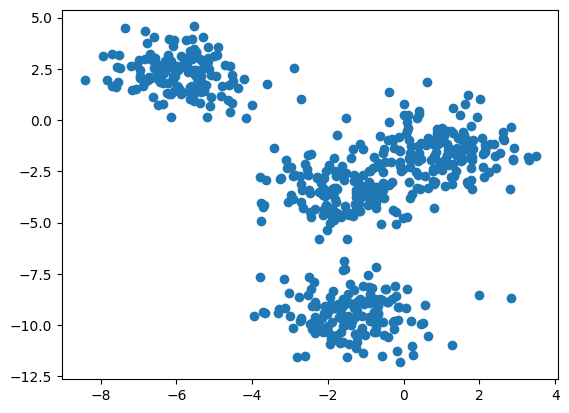

In [2]:
X, y = make_blobs(  #今回，目的変数（教師データ）yは用いない
    n_samples=600,  # サンプル数
    n_features=2,    # データ（説明変数）の特徴量の種類
    centers=4,       # データのグループ数
    cluster_std=1.0, # データのばらつきの標準偏差
    random_state=2)  # 確率変数の再現性を設定
X_train = X
y_train = y
plt.scatter(X_train[:,0], X_train[:,1])


散布図を見ると3つのグループ（クラスタ）に見えるので，クラスタを3つとして分類

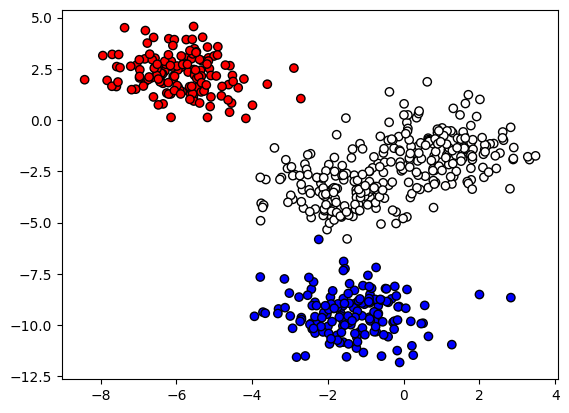

In [3]:
kmeans = KMeans(n_clusters=3)
y_train_est = kmeans.fit_predict(X_train)
#print(y_train_est[0:20])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_est, cmap=cm.bwr, edgecolors='k')


In [4]:
centers = kmeans.cluster_centers_
centers

array([[-1.37912767, -9.44881589],
       [-0.2785545 , -2.42522496],
       [-5.89563127,  2.25366418]])

In [5]:
from scipy.spatial.distance import cdist
radii = [cdist(X_train[y_train_est == i], [center]).max()
            for i, center in enumerate(centers)]
radii

[4.280953748239845, 4.386030170134254, 3.4009359599781477]

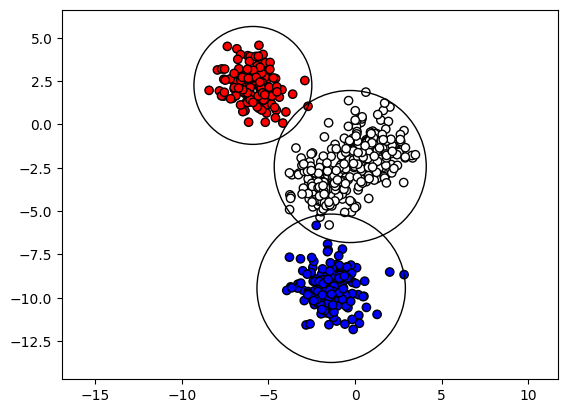

In [6]:
# plot the representation of the KMeans model
centers = kmeans.cluster_centers_
radii = [cdist(X_train[y_train_est == i], [center]).max()
            for i, center in enumerate(centers)]
fig, ax = plt.subplots(facecolor="w")
ax.axis('equal')
#plt.scatter(X_train[:,0], X_train[:,1], c=y_train_est, cmap=cm.bwr, edgecolors='k')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_est,cmap=cm.bwr, edgecolors='k')
for c, r in zip(centers, radii):
        #ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.4, zorder=1))
        ax.add_patch(plt.Circle(c, r,fill=False,color = 'k'))

In [7]:
radii

[4.280953748239845, 4.386030170134254, 3.4009359599781477]

In [8]:
#plot_kmeans(kmeans, X_train)

クラスタを4つとして分類

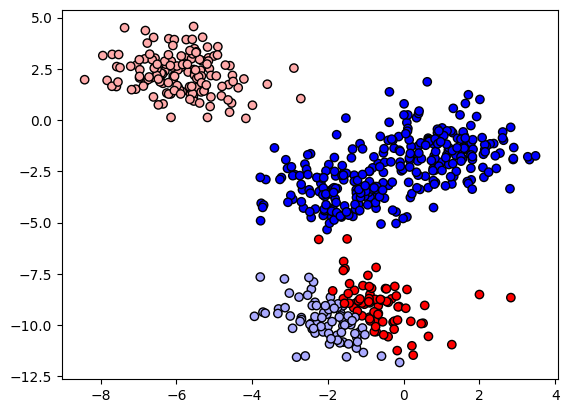

In [9]:
kmeans = KMeans(n_clusters=4)
cluster = kmeans.fit(X_train)
y_train_est = kmeans.predict(X_train)
#print(y_train_est[0:20])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_est, cmap=cm.bwr, edgecolors='k')


上記の2つの結果を見て，クラスタ数が３または４なのか，どちらが正しいかは不明としか言いようがない。

あまり意味はないが，クラスタ数が真のそれと一致しているとき，クラスタ器の性能評価を行ってみる。
ただし，評価は難しい。理由は，y_train_estに与えられるクラスタ番号の順序が一定していないので，
y_trainのクラスタ番号に順に合わせる必要がある。
そのため，上記まで実行したら，スクリプトはこれ以降のみを扱い，眼で見て修正を行う。
あまり意味はないが，クラスタ数が真のそれと一致しているとき，クラスタ器の性能評価を行ってみる。
ただし，評価は難しい。理由は，y_train_estに与えられるクラスタ番号の順序が一定していないので，
y_trainのクラスタ番号に順に合わせる必要がある。
そのため，上記まで実行したら，スクリプトはこれ以降のみを扱い，眼で見て修正を行う

検証するには、accuracy_score関数や、classification_report関数を使います。

In [10]:
print('accuracy =%f ' % accuracy_score(y_train, y_train_est))
print(classification_report(y_train, y_train_est))

accuracy =0.000000 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     150.0
           1       0.00      0.00      0.00     150.0
           2       0.00      0.00      0.00     150.0
           3       0.00      0.00      0.00     150.0

    accuracy                           0.00     600.0
   macro avg       0.00      0.00      0.00     600.0
weighted avg       0.00      0.00      0.00     600.0



## K平均法を回帰に使う、カリフォルニア住宅価格データセット
過去はボストン住宅価格を使っていたが、データセットに問題があった

The Boston housing prices dataset has an ethical problem: as
investigated in [1]

[1] M Carlisle.
"Racist data destruction?"</br>
https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8

In [13]:
import pandas as pd
#california_housing.csv
url = 'https://raw.githubusercontent.com/miwamasa/DataScience2025/main/notebooks/data/california_housing.csv'
home_data = pd.read_csv(url, usecols = ['longitude', 'latitude', 'median_house_value'])
print(len(home_data))
home_data.head()

HTTPError: HTTP Error 404: Not Found

データセットは、カリフォルニア州の、20640か所における、住宅価格データの集計値

- longitude	緯度
- latitude	経度
- median_house_value　住宅価格の中央値

緯度経度に従って、可視化してみる。

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
#plt.savefig('fig_california_house_price.jpg')

訓練データと、テストデータに分けます

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

データを標準化します。

In [ ]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

K平均法(KMeans)によりクラスタリングを試みます、K=3

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

結果をプロットします。北、中央、南に分けることができたようです。

In [ ]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

ボックスプロットをしてます。

In [ ]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

scikit-learnのsilhouette_scoreは、クラスタリングの性能を評価するための指標の1つで、シルエット係数と呼ばれます。シルエット係数は、クラスタリング結果の質を測る指標の1つで、クラスタ内のデータの密度と、クラスタ間の距離のバランスを測るものです。値は-1から1の範囲で表され、1に近づくほどクラスタリングが良好であることを示します。

具体的には、シルエット係数は、以下のように定義されます。

$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

ここで、$a(i)$はデータ点$i$と同じクラスタ内の他の点との平均距離を表し、$b(i)$はデータ点$i$を含まないクラスタ内の点との平均距離を表します。$s(i)$は、データ点$i$のシルエット係数であり、全てのデータ点のシルエット係数の平均を取ったものが、クラスタリングの結果を表すシルエット係数となります。


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

## Choosing the best number of clusters

評価指標がきまれば、最適なクラスの数を探索します。

In [ ]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

In [ ]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

In [ ]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

In [ ]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_)

In [ ]:
sns.lineplot(x = K, y = score)
plt.savefig("fig_california_kmeans_kplot.jpg")

In [ ]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)
plt.savefig("fig_california_kmeans_k5.jpg")

In [ ]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])
plt.savefig("fig_california_kmeans_k5box.jpg")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

# 予測
list_pred = knr.predict(X_test)

In [ ]:
# テストデータ上での正解値（青）と予測値（赤）をプロット

plt.xlabel("y_test")
plt.ylabel("list_pred")
plt.scatter(y_test,list_pred)
plt.savefig("fig_california_kmeans_k5predict.jpg")

## 凝集型の階層クラスタリング

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster import hierarchy


In [ ]:
data = np.array([[2,1], [1,1], [1,4], [2,5], [4,4]])

In [ ]:
fig = plt.subplots(figsize=(5,5))
plt.xlim(0,6)
plt.ylim(0,6)
plt.grid()
plt.scatter(data[:,0], data[:,1])

scipy.cluster.hierarchy.linkage<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
scipy.cluster.hierarchy.dendrogram<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

群平均法：method='average'

In [ ]:
result_ave = hierarchy.linkage(data, method='average')
print(result_ave)

In [ ]:
var = hierarchy.dendrogram(result_ave)


Ward法：method='ward'

In [ ]:
result_ward = hierarchy.linkage(data, 'ward')
print(result_ward)

In [ ]:
var = hierarchy.dendrogram(result_ward)


#### 富山県の市町村別人口動態
人口移動調査　http://www.pref.toyama.jp/sections/1015/lib/jinko/　の中にある。<br>
オリジナルデータは次：url = 'http://www.pref.toyama.jp/sections/1015/lib/jinko/_dat_h29/jinko_dat005.xls'<br>
これをローカルフォルダに保存して，これを読込んで使用。

In [ ]:
!pip install japanize-matplotlib

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.cluster import hierarchy
import japanize_matplotlib
japanize_matplotlib.japanize()


In [ ]:
!pip install xlrd==2.0.1

In [ ]:
#データがtoyama.jpからダウンロードできない場合は、エラーとなる場合は、ファイルをColabにアップロードして使う

url = 'http://www.pref.toyama.jp/sections/1015/lib/jinko/_dat_h29/jinko_dat005.xls'
url = 'https://raw.githubusercontent.com/miwamasa/DataScience2024/main/notebooks/data/jinko_dat005.xls'
data_orig = pd.read_excel(url, header=None)

In [ ]:
#データのフォーマットを見て，必要，不必要な行，列を判別する
data = data_orig.drop([0,1,2,3,4],axis=0)
# drop=True: indexの降り直し,  inplace=True: 書き換えは自身のメモリで行う
data.reset_index(drop=True, inplace=True)
data.head()

上記を見て，市の名前（カラム0），自然増加（カラム2），転入総数（カラム6），転出総数（カラム9）を用いることとし，これをDataFrame dfに結合する

In [ ]:
df = pd.concat([data.iloc[:,0], data.iloc[0:,2], data.iloc[0:,6], data.iloc[0:,9]], axis=1)
df.head()

In [ ]:
#dfの各列にラベルを与える, city:市の名前，natural:自然増加, in:転入総数，out:転出総
df.columns = ['city', 'natural', 'in', 'out']
df.head()

相関図（横軸：自然増加，縦軸：転入総数）をプロットする。このとき，各点に市の名前を付加する

In [ ]:
!pip install japanize-matplotlib

In [ ]:
names = df.city
city_labels = list(names) # dendrogramへの入力はリスト形式

In [ ]:
import japanize_matplotlib
fig = plt.subplots(figsize=(8,4)) # (22,18)
#plt.rcParams['font.family'] ='IPAPGothic' # 日本語フォントを使うため
plt.xlabel('natural')
plt.ylabel('in')
plt.scatter(df['natural'], df['in'])
for i, text in enumerate(df.city):
    plt.annotate(text, xy=(df['natural'][i], df['in'][i]), size=10 )


df2 は，クラスタ分析のために，cityを削除したデータフレームであ

In [ ]:
fig = plt.subplots(figsize=(8,4))
df2 = df.drop('city',axis=1)
Z = hierarchy.linkage(df2, 'ward')
dn = hierarchy.dendrogram(Z, labels=city_labels, leaf_rotation=90.)


#### 相関図
念のため，各変数同士の相関図を見る。<br>
seabornのプロットは，バージョン0.9.0から，この例のようなデータセットの種類の数に応じた色数を明示的に用意することが求められる。<br>
そうでないと，次のエラーが現れる "ValueError: color kwarg must have one color per dataset"<br>
ここでは，簡単に，hue='out'と指定した。ここに，'out'はdfのラベル名。幾つかのWarningが現れるが，気にしないことにする。

In [ ]:
sns.pairplot(df, hue='out')


上記の結果を見て，in, outに強い相関が有ることが認められる。naturalと（in, out）にも負の相関が認められるが，若干，外れる市町村があり，この原因究明も興味深い調査となるであろう。

## 主成分分析

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

データを作ります（make_blob)、数は200

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

2次元の主成分分析します。

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

得られた主成分を見ます。

In [ ]:
print(pca.components_)

In [ ]:
print(pca.explained_variance_)

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    facecolor='red', edgecolor='red',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### PCA as dimensionality reduction

次元圧縮をする例です。 2次元のデータを１次元に次元圧縮します。

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

In [ ]:
X_pca

次元圧縮されたデータを、元の次元に戻して可視化します。

一次元（斜め上になってますが）に射影されているような感じになってます。

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### PCA for visualization: Hand-written digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

In [ ]:
digits.data[1]

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:

from sklearn.manifold import TSNE
import sklearn.datasets

digits, label = sklearn.datasets.load_digits(return_X_y=True)
digits = digits / 255
digits2d = TSNE(n_components=2).fit_transform(digits)

from matplotlib import pylab as plt

f, ax = plt.subplots(1, 1, figsize=(10, 10))
for i in range(10):
    target = digits2d[label == i]
    ax.scatter(x=target[:, 0], y=target[:, 1], label=str(i), alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

## ガウス混合分布

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris

# irisデータセットのロード
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

# 種類 (ラベル) によって、サンプル数を変えます
d1 = df[df['label'] == 0].sample(30)  # setosa
d2 = df[df['label'] == 1].sample(50)  # versicolor
d3 = df[df['label'] == 2].sample(40)  # virginica

# 萼片長のデータのみを使う
X = pd.concat([d1['sepal length (cm)'], d2['sepal length (cm)'], d3['sepal length (cm)']])
Y = pd.concat([d1['label'], d2['label'], d3['label']])

# ヒストグラム
plt.hist([X[Y==0], X[Y==1], X[Y==2]], bins=np.arange(X.min(), X.max(), 0.2), stacked=True, label=iris.target_names)
plt.title('sepal length histgram')
plt.legend()

In [ ]:
d1.head()

In [ ]:
# GaussianMixtureの学習
gmm = GaussianMixture(
    n_components=3,
    covariance_type='spherical'
).fit(
    np.array(X).reshape(-1, 1)  # 次元数2を入力とするため変形
)

# 重み
print(gmm.weights_)
# [0.309359   0.43752389 0.25311711]

# 期待値
print(gmm.means_)
# [[5.80722255]
#  [6.57885203]
#  [4.93215112]]

# 分散
print(gmm.covariances_)
# [0.10564111 0.32196481 0.06607687]

In [ ]:
from scipy.stats import norm
x = np.linspace(3, 9, 600)

gd1 = norm.pdf(x, gmm.means_[0, -1], np.sqrt(gmm.covariances_[0]))
gd2 = norm.pdf(x, gmm.means_[1, -1], np.sqrt(gmm.covariances_[1]))
gd3 = norm.pdf(x, gmm.means_[2, -1], np.sqrt(gmm.covariances_[2]))

plt.plot(x, gmm.weights_[0] * gd1, label='gd1',color='C1')
plt.plot(x, gmm.weights_[1] * gd2, label='gd2',color='C2')
plt.plot(x, gmm.weights_[2] * gd3, label='gd3',color='C0')
plt.legend()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

In [ ]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [ ]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

#### Generalizing E–M: Gaussian Mixture Models

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        # なぜか、陽に angle=をつけないと引数のミスカウントされてしまうのを修正2024.5.11
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

In [ ]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

## 付録：カリフォルニア住宅価格 by ガウス混合分布

---




In [ ]:
import pandas as pd
#california_housing.csv
url = 'https://raw.githubusercontent.com/miwamasa/DataScience2024/main/notebooks/data/california_housing.csv'
home_data = pd.read_csv(url, usecols = ['longitude', 'latitude', 'median_house_value'])
print(len(home_data))
home_data.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# ガウス混合モデルによるクラスタリングを行う
# 緯度と経度のデータを取り出す
X = home_data[['longitude', 'latitude']].values

gmm = GaussianMixture(n_components=5)
gmm.fit(X)
y_pred = gmm.predict(X)

# クラスタリングの結果を可視化する
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = y_pred)


In [ ]:
sns.boxplot(x = y_pred, y = home_data['median_house_value'])